In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PyNomaly import loop
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

In [6]:
train = pd.read_csv('../data/new_train.csv')
test = pd.read_csv('../data/new_test.csv')
mcf = pd.read_csv('../data/monthly_card_features.csv')
train = train.drop(columns=['Unnamed: 0', 'first_active_month']).set_index('card_id')
test = test.drop(columns=['Unnamed: 0', 'first_active_month']).set_index('card_id')
train = train.join(mcf.groupby('card_id').agg({
    'amt_total': [np.min, np.mean, np.max],
    'NDR':       [np.min, np.mean, np.max],
    'n_new_merchants':   np.mean,
    'n_total_merchants': np.max
}))
test = test.join(mcf.groupby('card_id').agg({
    'amt_total': [np.min, np.mean, np.max],
    'NDR':       [np.min, np.mean, np.max],
    'n_new_merchants':   np.mean,
    'n_total_merchants': np.max
}))
train.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in train.columns.values]
test.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in test.columns.values]

/Users/michaelfedell/anaconda3/lib/python3.7/site-packages/pandas/core/reshape/merge.py:522: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)
/Users/michaelfedell/anaconda3/lib/python3.7/site-packages/pandas/core/reshape/merge.py:522: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)


feature_1


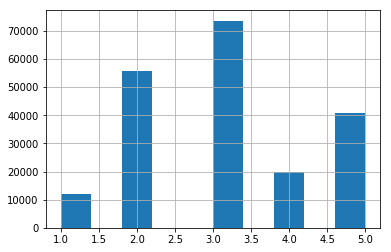

feature_2


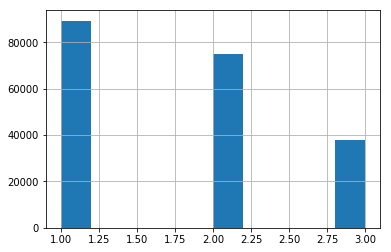

feature_3


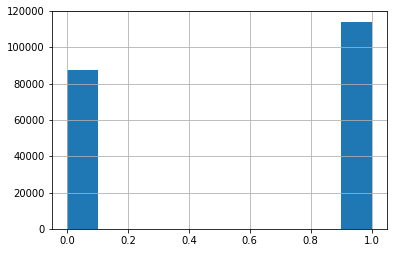

target


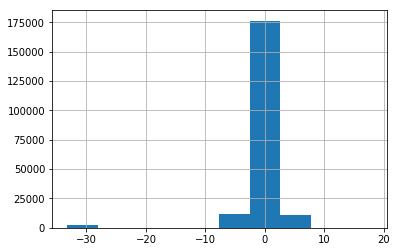

tof


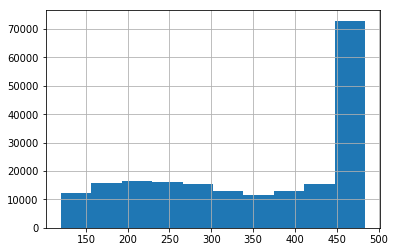

recency


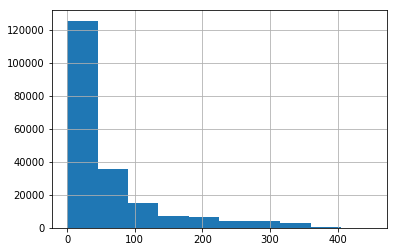

frequency


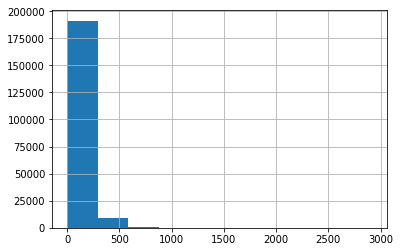

log_freq


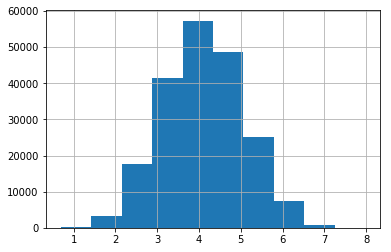

amt


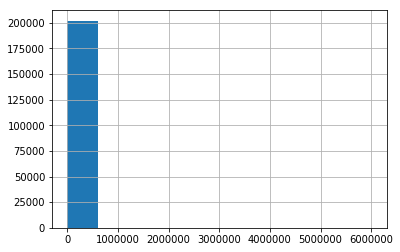

avg_amt


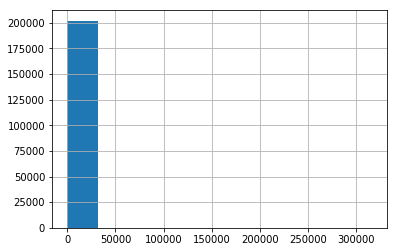

charge_per_day


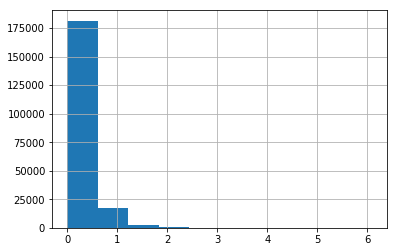

log_charge_per_day


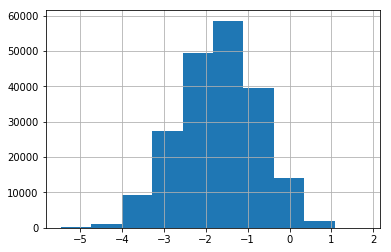

max_amt


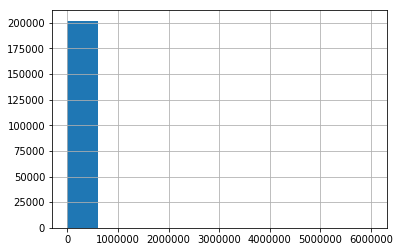

n_declines


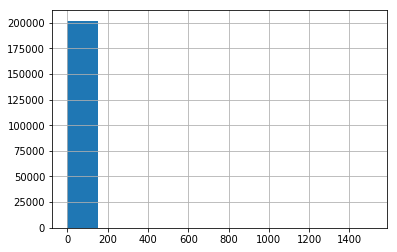

log_n_declines


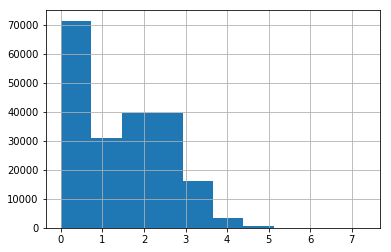

prop_new


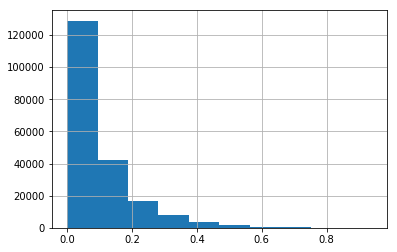

merch_cat_1_Y


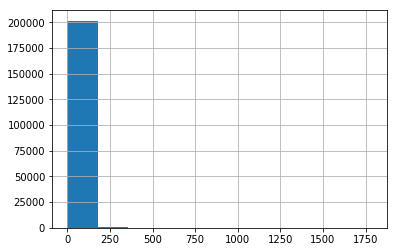

merch_cat_2_1


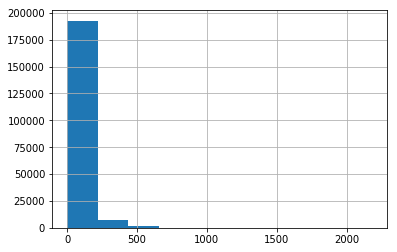

merch_cat_2_2


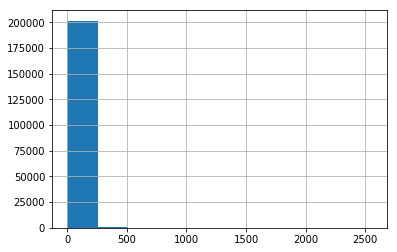

merch_cat_2_3


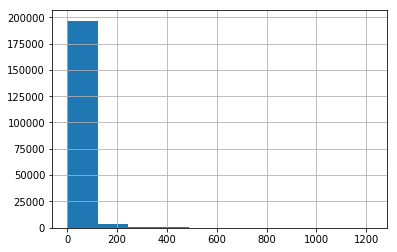

merch_cat_2_4


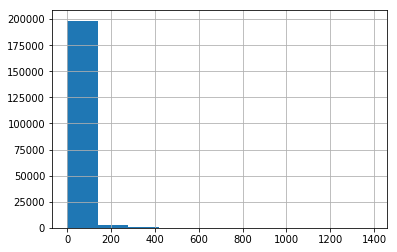

merch_cat_2_5


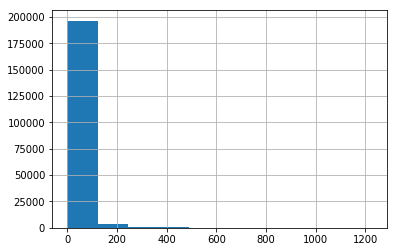

amt_total_amin


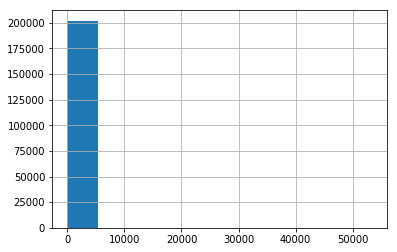

amt_total_mean


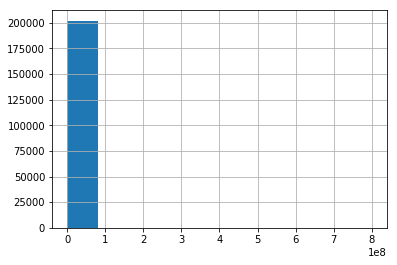

amt_total_amax


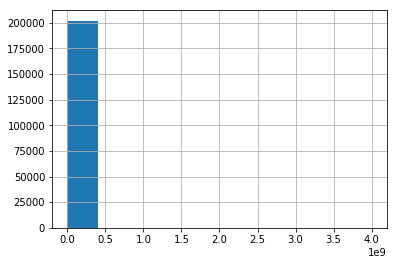

NDR_amin


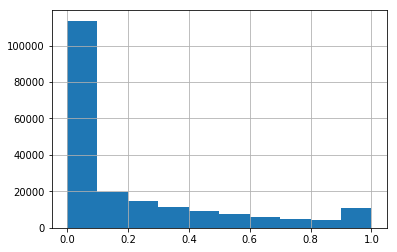

NDR_mean


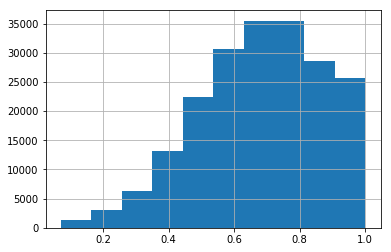

NDR_amax


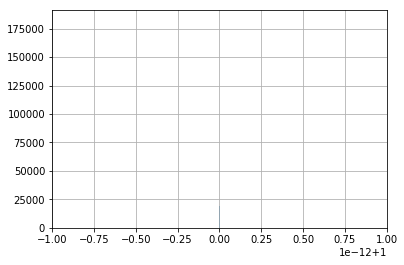

n_new_merchants_mean


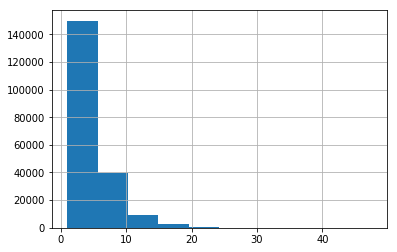

n_total_merchants_amax


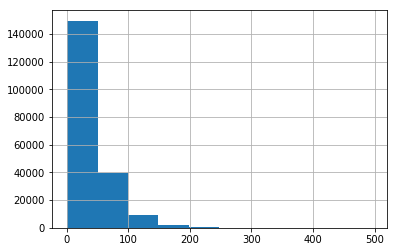

In [4]:
for col in train.columns:
    print(col)
    train[col].hist()
    plt.show()

In [3]:
scaler = StandardScaler()
scaler.fit(train)

/Users/michaelfedell/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [4]:
scaler.transform(train)

/Users/michaelfedell/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


array([[ 1.59733489,  0.33883864,  0.87643071, ...,  0.        ,
         1.86003668,  2.26966881],
       [ 0.75427592, -0.99208151, -1.14099151, ...,  0.        ,
         1.59842742,  3.14183476],
       [-0.93184201,  0.33883864, -1.14099151, ...,  0.        ,
        -0.69157484, -0.75383983],
       ...,
       [ 0.75427592,  1.66975879, -1.14099151, ...,  0.        ,
         0.98756714,  0.43812031],
       [-0.08878304,  0.33883864,  0.87643071, ...,  0.        ,
        -0.79290237, -0.46311785],
       [-0.08878304, -0.99208151,  0.87643071, ...,  0.        ,
        -0.14693934, -0.20146806]])

In [5]:
train = pd.DataFrame(data=scaler.transform(train),columns = train.columns,index=train.index)

/Users/michaelfedell/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [6]:
train.columns

Index(['feature_1', 'feature_2', 'feature_3', 'target', 'tof', 'recency',
       'frequency', 'log_freq', 'amt', 'avg_amt', 'charge_per_day',
       'log_charge_per_day', 'max_amt', 'n_declines', 'log_n_declines',
       'prop_new', 'merch_cat_1_Y', 'merch_cat_2_1', 'merch_cat_2_2',
       'merch_cat_2_3', 'merch_cat_2_4', 'merch_cat_2_5', 'amt_total_amin',
       'amt_total_mean', 'amt_total_amax', 'NDR_amin', 'NDR_mean', 'NDR_amax',
       'n_new_merchants_mean', 'n_total_merchants_amax'],
      dtype='object')

In [7]:
train = train.drop(columns=['feature_1', 'feature_2', 'feature_3', 'target'])

In [ ]:
db = DBSCAN(eps=0.6, min_samples=50).fit(train)

In [21]:
m = loop.LocalOutlierProbability(train, extent=2, n_neighbors=20, cluster_labels=list(db.labels_)).fit()

NameError: name 'db' is not defined

In [ ]:
scores = m.local_outlier_probabilities
scores.head()

In [8]:
m = loop.LocalOutlierProbability(train).fit()
scores = m.local_outlier_probabilities
print(scores) 

KeyboardInterrupt: 

In [9]:
train.to_csv('temp.csv')

In [4]:
tmp = pd.read_csv('../tmp.csv')

In [5]:
tmp.head()

,card_id,tof,recency,frequency,log_freq,amt,avg_amt,charge_per_day,log_charge_per_day,max_amt,...,merch_cat_2_5,amt_total_amin,amt_total_mean,amt_total_amax,NDR_amin,NDR_mean,NDR_amax,n_new_merchants_mean,n_total_merchants_amax,loop
0,C_ID_92a2005557,-0.367248,-0.735789,1.749214,1.601769,-0.116633,-0.020106,2.249696,1.706201,-0.024030,...,-0.201955,-0.114698,-0.014156,-0.019442,-0.460493,-0.266980,-0.313093,1.867097,2.260876,0.071341
1,C_ID_3d0044924f,1.077562,-0.342406,2.429495,1.839417,-0.142531,-0.018999,1.626223,1.479076,-0.022259,...,-0.268581,-0.372430,-0.010928,-0.022220,-0.362778,-0.524256,-0.313093,1.604974,3.129019,0.508153
2,C_ID_d639edf6cd,1.035562,-0.722676,-0.478009,-0.325709,-0.006596,-0.021726,-0.657848,-0.726691,-0.025826,...,0.619769,-0.366536,-0.031139,-0.028013,-0.706536,-2.092954,-0.313093,-0.689522,-0.748685,0.157907
3,C_ID_186d6a6901,-1.131653,-0.591548,-0.105252,0.343924,-0.024484,-0.020509,0.378428,0.789624,-0.024637,...,-0.268581,-0.033016,-0.025818,-0.026032,0.479694,0.958971,-0.313093,0.769920,0.495653,0.161728
4,C_ID_cdbd2c0db2,-1.526456,-0.722676,0.686856,1.067878,-0.035144,-0.012023,2.514643,1.789705,-0.020345,...,-0.246372,4.088647,0.027954,-0.001894,2.076407,1.271643,-0.313093,3.828402,1.826805,0.084784


In [9]:
tmp = tmp.set_index('card_id').join(train['target'])

In [13]:
chump_ids = tmp[tmp.target < -20].index.values
pred_chump_ids = tmp[tmp.loop > 0.5].index.values

In [18]:
len(set(chump_ids).intersection(pred_chump_ids)) / len(chump_ids)

0.06382978723404255